In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [5]:
dir_aceite="aceite.xls"
dir_alcohol="alcohol.xls"
dir_lavandina="lavandina.xls"
dir_limpia="limpia.xls"
dir_polvo="polvo.xls"
dir_quemado="quemado.xls"
dir_te="te.xls"

aceite=pd.read_excel(dir_aceite,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
alcohol=pd.read_excel(dir_alcohol,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
lavandina=pd.read_excel(dir_lavandina,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
limpia=pd.read_excel(dir_limpia,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
polvo=pd.read_excel(dir_polvo,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
quemado=pd.read_excel(dir_quemado,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
te=pd.read_excel(dir_te,header=1,usecols=["Valor_R","Valor_V","Valor_A"])

aceite.drop(0, inplace=True)
alcohol.drop(0, inplace=True)
lavandina.drop(0, inplace=True)
limpia.drop(0, inplace=True)
polvo.drop(0, inplace=True)
quemado.drop(0, inplace=True)
te.drop(0, inplace=True)

aceite["etiqueta"]=0
alcohol["etiqueta"]=1
lavandina["etiqueta"]=2
limpia["etiqueta"]=3
polvo["etiqueta"]=4
quemado["etiqueta"]=5
te["etiqueta"]=6

df=pd.concat([aceite,alcohol,lavandina,limpia,polvo,quemado,te], axis=0,ignore_index=True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.3, stratify = df["etiqueta"])

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
def create_model():
    model = Sequential()
    model.add(Dense(7, input_dim=3,activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
model=create_model()
history = model.fit(X_train, y_train,epochs=2000,validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
16/16 [==============================] - 1s 23ms/step - loss: 139.0131 - accuracy: 0.1423 - val_loss: 136.1778 - val_accuracy: 0.1442
Epoch 2/2000
16/16 [==============================] - 0s 7ms/step - loss: 133.3422 - accuracy: 0.1423 - val_loss: 130.5436 - val_accuracy: 0.1442
Epoch 3/2000
16/16 [==============================] - 0s 5ms/step - loss: 127.7340 - accuracy: 0.1423 - val_loss: 124.8855 - val_accuracy: 0.1442
Epoch 4/2000
16/16 [==============================] - 0s 5ms/step - loss: 122.1224 - accuracy: 0.1423 - val_loss: 119.1899 - val_accuracy: 0.1442
Epo

16/16 [==============================] - 0s 4ms/step - loss: 2.9559 - accuracy: 0.1464 - val_loss: 3.0020 - val_accuracy: 0.1346
Epoch 55/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9585 - accuracy: 0.1113 - val_loss: 3.0087 - val_accuracy: 0.1298
Epoch 56/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9578 - accuracy: 0.1567 - val_loss: 2.9889 - val_accuracy: 0.1394
Epoch 57/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9382 - accuracy: 0.1567 - val_loss: 2.9847 - val_accuracy: 0.1346
Epoch 58/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9574 - accuracy: 0.1113 - val_loss: 2.9828 - val_accuracy: 0.1394
Epoch 59/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9348 - accuracy: 0.1567 - val_loss: 2.9749 - val_accuracy: 0.1442
Epoch 60/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.9340 - accuracy: 0.1443 - val_loss: 2.9743 - val_accuracy: 0.1394
Epoch 61/2000

16/16 [==============================] - 0s 4ms/step - loss: 2.6790 - accuracy: 0.1505 - val_loss: 2.7414 - val_accuracy: 0.1154
Epoch 112/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.6756 - accuracy: 0.1361 - val_loss: 2.7154 - val_accuracy: 0.1346
Epoch 113/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.6958 - accuracy: 0.1649 - val_loss: 2.7089 - val_accuracy: 0.1442
Epoch 114/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.6808 - accuracy: 0.1608 - val_loss: 2.7070 - val_accuracy: 0.1538
Epoch 115/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.6704 - accuracy: 0.1588 - val_loss: 2.7087 - val_accuracy: 0.1346
Epoch 116/2000
16/16 [==============================] - 0s 6ms/step - loss: 2.6617 - accuracy: 0.1464 - val_loss: 2.6971 - val_accuracy: 0.1538
Epoch 117/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.6556 - accuracy: 0.1670 - val_loss: 2.7063 - val_accuracy: 0.1442
Epoch 1

Epoch 168/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.3980 - accuracy: 0.1649 - val_loss: 2.4443 - val_accuracy: 0.1538
Epoch 169/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.4074 - accuracy: 0.1608 - val_loss: 2.4378 - val_accuracy: 0.1346
Epoch 170/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.3914 - accuracy: 0.1443 - val_loss: 2.4395 - val_accuracy: 0.1346
Epoch 171/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.3977 - accuracy: 0.1629 - val_loss: 2.4305 - val_accuracy: 0.1587
Epoch 172/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.3776 - accuracy: 0.1505 - val_loss: 2.4195 - val_accuracy: 0.1635
Epoch 173/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.3840 - accuracy: 0.1918 - val_loss: 2.4160 - val_accuracy: 0.1442
Epoch 174/2000
16/16 [==============================] - 0s 6ms/step - loss: 2.3931 - accuracy: 0.1443 - val_loss: 2.4341 - val_accuracy:

Epoch 225/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1573 - accuracy: 0.2330 - val_loss: 2.1949 - val_accuracy: 0.1538
Epoch 226/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1522 - accuracy: 0.1753 - val_loss: 2.1871 - val_accuracy: 0.1731
Epoch 227/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1367 - accuracy: 0.2309 - val_loss: 2.1872 - val_accuracy: 0.2163
Epoch 228/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1506 - accuracy: 0.2351 - val_loss: 2.1809 - val_accuracy: 0.1490
Epoch 229/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1384 - accuracy: 0.2021 - val_loss: 2.1730 - val_accuracy: 0.1635
Epoch 230/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1295 - accuracy: 0.2000 - val_loss: 2.1837 - val_accuracy: 0.1827
Epoch 231/2000
16/16 [==============================] - 0s 3ms/step - loss: 2.1371 - accuracy: 0.2144 - val_loss: 2.1668 - val_accuracy:

Epoch 282/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.9428 - accuracy: 0.3155 - val_loss: 1.9856 - val_accuracy: 0.2308
Epoch 283/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.9766 - accuracy: 0.2206 - val_loss: 1.9917 - val_accuracy: 0.2596
Epoch 284/2000
16/16 [==============================] - ETA: 0s - loss: 2.0267 - accuracy: 0.28 - 0s 4ms/step - loss: 1.9552 - accuracy: 0.2907 - val_loss: 1.9872 - val_accuracy: 0.2885
Epoch 285/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.9484 - accuracy: 0.2804 - val_loss: 1.9809 - val_accuracy: 0.2548
Epoch 286/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.9376 - accuracy: 0.2928 - val_loss: 1.9741 - val_accuracy: 0.2788
Epoch 287/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.9440 - accuracy: 0.2701 - val_loss: 1.9751 - val_accuracy: 0.2356
Epoch 288/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.9605 - accuracy:

16/16 [==============================] - 0s 4ms/step - loss: 1.8048 - accuracy: 0.3588 - val_loss: 1.8268 - val_accuracy: 0.3558
Epoch 339/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.8058 - accuracy: 0.3753 - val_loss: 1.8289 - val_accuracy: 0.3317
Epoch 340/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7987 - accuracy: 0.3320 - val_loss: 1.8169 - val_accuracy: 0.3365
Epoch 341/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7929 - accuracy: 0.3505 - val_loss: 1.8165 - val_accuracy: 0.3510
Epoch 342/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7869 - accuracy: 0.3588 - val_loss: 1.8153 - val_accuracy: 0.3606
Epoch 343/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.7880 - accuracy: 0.3567 - val_loss: 1.8167 - val_accuracy: 0.3365
Epoch 344/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7870 - accuracy: 0.3649 - val_loss: 1.8167 - val_accuracy: 0.3317
Epoch 3

Epoch 395/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.6830 - accuracy: 0.3814 - val_loss: 1.6968 - val_accuracy: 0.3654
Epoch 396/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.6837 - accuracy: 0.3835 - val_loss: 1.6913 - val_accuracy: 0.3558
Epoch 397/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.6778 - accuracy: 0.3526 - val_loss: 1.6842 - val_accuracy: 0.3558
Epoch 398/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.6890 - accuracy: 0.3814 - val_loss: 1.6903 - val_accuracy: 0.3606
Epoch 399/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.6982 - accuracy: 0.3711 - val_loss: 1.6979 - val_accuracy: 0.3173
Epoch 400/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.6881 - accuracy: 0.3258 - val_loss: 1.6837 - val_accuracy: 0.3750
Epoch 401/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.6754 - accuracy: 0.3814 - val_loss: 1.6846 - val_accuracy:

16/16 [==============================] - 0s 6ms/step - loss: 1.5844 - accuracy: 0.4103 - val_loss: 1.5859 - val_accuracy: 0.3894
Epoch 452/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.5780 - accuracy: 0.3918 - val_loss: 1.5844 - val_accuracy: 0.3654
Epoch 453/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5751 - accuracy: 0.3773 - val_loss: 1.5860 - val_accuracy: 0.4279
Epoch 454/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5858 - accuracy: 0.4309 - val_loss: 1.5770 - val_accuracy: 0.3750
Epoch 455/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5833 - accuracy: 0.3856 - val_loss: 1.5847 - val_accuracy: 0.3702
Epoch 456/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5727 - accuracy: 0.4041 - val_loss: 1.5773 - val_accuracy: 0.4135
Epoch 457/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.5667 - accuracy: 0.4165 - val_loss: 1.5732 - val_accuracy: 0.3750
Epoch 4

Epoch 508/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4947 - accuracy: 0.4227 - val_loss: 1.5009 - val_accuracy: 0.4760
Epoch 509/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4991 - accuracy: 0.4247 - val_loss: 1.5001 - val_accuracy: 0.4231
Epoch 510/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5123 - accuracy: 0.4351 - val_loss: 1.5052 - val_accuracy: 0.4712
Epoch 511/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5115 - accuracy: 0.4412 - val_loss: 1.4986 - val_accuracy: 0.4327
Epoch 512/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4978 - accuracy: 0.4124 - val_loss: 1.4988 - val_accuracy: 0.4038
Epoch 513/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5017 - accuracy: 0.4536 - val_loss: 1.4923 - val_accuracy: 0.4327
Epoch 514/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4972 - accuracy: 0.4227 - val_loss: 1.4894 - val_accuracy:

Epoch 565/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4417 - accuracy: 0.4206 - val_loss: 1.4250 - val_accuracy: 0.4856
Epoch 566/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4301 - accuracy: 0.4866 - val_loss: 1.4256 - val_accuracy: 0.4712
Epoch 567/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4278 - accuracy: 0.4866 - val_loss: 1.4201 - val_accuracy: 0.4471
Epoch 568/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4252 - accuracy: 0.4928 - val_loss: 1.4231 - val_accuracy: 0.5288
Epoch 569/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4221 - accuracy: 0.4660 - val_loss: 1.4180 - val_accuracy: 0.4808
Epoch 570/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4217 - accuracy: 0.4660 - val_loss: 1.4151 - val_accuracy: 0.4567
Epoch 571/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4221 - accuracy: 0.4474 - val_loss: 1.4214 - val_accuracy:

Epoch 622/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3821 - accuracy: 0.4887 - val_loss: 1.3640 - val_accuracy: 0.5048
Epoch 623/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.3924 - accuracy: 0.4866 - val_loss: 1.3748 - val_accuracy: 0.5481
Epoch 624/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3851 - accuracy: 0.4804 - val_loss: 1.3660 - val_accuracy: 0.5048
Epoch 625/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3699 - accuracy: 0.5155 - val_loss: 1.3583 - val_accuracy: 0.4808
Epoch 626/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3648 - accuracy: 0.5072 - val_loss: 1.3554 - val_accuracy: 0.4808
Epoch 627/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3586 - accuracy: 0.4948 - val_loss: 1.3585 - val_accuracy: 0.4904
Epoch 628/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3686 - accuracy: 0.5010 - val_loss: 1.3579 - val_accuracy:

Epoch 679/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3277 - accuracy: 0.4990 - val_loss: 1.3120 - val_accuracy: 0.5337
Epoch 680/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3392 - accuracy: 0.5423 - val_loss: 1.3082 - val_accuracy: 0.5288
Epoch 681/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3280 - accuracy: 0.5732 - val_loss: 1.3082 - val_accuracy: 0.5288
Epoch 682/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3258 - accuracy: 0.4990 - val_loss: 1.3105 - val_accuracy: 0.5865
Epoch 683/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3308 - accuracy: 0.5732 - val_loss: 1.3066 - val_accuracy: 0.5577
Epoch 684/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3186 - accuracy: 0.5443 - val_loss: 1.3055 - val_accuracy: 0.4760
Epoch 685/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3243 - accuracy: 0.5258 - val_loss: 1.3028 - val_accuracy:

Epoch 736/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.2838 - accuracy: 0.5897 - val_loss: 1.2731 - val_accuracy: 0.5096
Epoch 737/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2910 - accuracy: 0.5423 - val_loss: 1.2630 - val_accuracy: 0.5481
Epoch 738/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2888 - accuracy: 0.5588 - val_loss: 1.2718 - val_accuracy: 0.5481
Epoch 739/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2896 - accuracy: 0.5237 - val_loss: 1.2668 - val_accuracy: 0.5625
Epoch 740/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2753 - accuracy: 0.5670 - val_loss: 1.2627 - val_accuracy: 0.5337
Epoch 741/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3011 - accuracy: 0.5629 - val_loss: 1.2613 - val_accuracy: 0.5192
Epoch 742/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2857 - accuracy: 0.5216 - val_loss: 1.2684 - val_accuracy:

Epoch 793/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2473 - accuracy: 0.5546 - val_loss: 1.2257 - val_accuracy: 0.5865
Epoch 794/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.2479 - accuracy: 0.5608 - val_loss: 1.2341 - val_accuracy: 0.5481
Epoch 795/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2465 - accuracy: 0.5814 - val_loss: 1.2236 - val_accuracy: 0.5529
Epoch 796/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.2564 - accuracy: 0.5278 - val_loss: 1.2392 - val_accuracy: 0.6106
Epoch 797/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.2558 - accuracy: 0.5959 - val_loss: 1.2241 - val_accuracy: 0.5385
Epoch 798/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2472 - accuracy: 0.5443 - val_loss: 1.2237 - val_accuracy: 0.5769
Epoch 799/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2394 - accuracy: 0.5959 - val_loss: 1.2236 - val_accuracy:

Epoch 850/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2166 - accuracy: 0.6062 - val_loss: 1.1963 - val_accuracy: 0.5913
Epoch 851/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2225 - accuracy: 0.5567 - val_loss: 1.1990 - val_accuracy: 0.5048
Epoch 852/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2125 - accuracy: 0.5979 - val_loss: 1.1916 - val_accuracy: 0.5817
Epoch 853/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2115 - accuracy: 0.5443 - val_loss: 1.1923 - val_accuracy: 0.5529
Epoch 854/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2081 - accuracy: 0.5588 - val_loss: 1.1967 - val_accuracy: 0.5673
Epoch 855/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2037 - accuracy: 0.5464 - val_loss: 1.1909 - val_accuracy: 0.5817
Epoch 856/2000
16/16 [==============================] - 0s 6ms/step - loss: 1.2017 - accuracy: 0.6103 - val_loss: 1.1919 - val_accuracy:

16/16 [==============================] - 0s 4ms/step - loss: 1.1917 - accuracy: 0.5588 - val_loss: 1.1651 - val_accuracy: 0.6635
Epoch 907/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1887 - accuracy: 0.5938 - val_loss: 1.1659 - val_accuracy: 0.5481
Epoch 908/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2060 - accuracy: 0.5753 - val_loss: 1.1709 - val_accuracy: 0.5385
Epoch 909/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1851 - accuracy: 0.5938 - val_loss: 1.1692 - val_accuracy: 0.5769
Epoch 910/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1796 - accuracy: 0.5856 - val_loss: 1.1655 - val_accuracy: 0.5913
Epoch 911/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2078 - accuracy: 0.5691 - val_loss: 1.1675 - val_accuracy: 0.4904
Epoch 912/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1951 - accuracy: 0.5278 - val_loss: 1.1624 - val_accuracy: 0.6442
Epoch 9

Epoch 963/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1724 - accuracy: 0.5567 - val_loss: 1.1390 - val_accuracy: 0.6058
Epoch 964/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1534 - accuracy: 0.6227 - val_loss: 1.1435 - val_accuracy: 0.6394
Epoch 965/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1615 - accuracy: 0.6289 - val_loss: 1.1347 - val_accuracy: 0.6202
Epoch 966/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1621 - accuracy: 0.5918 - val_loss: 1.1383 - val_accuracy: 0.5962
Epoch 967/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1556 - accuracy: 0.6351 - val_loss: 1.1355 - val_accuracy: 0.6202
Epoch 968/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1658 - accuracy: 0.6186 - val_loss: 1.1522 - val_accuracy: 0.6394
Epoch 969/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2048 - accuracy: 0.5629 - val_loss: 1.1413 - val_accuracy:

16/16 [==============================] - 0s 4ms/step - loss: 1.1379 - accuracy: 0.6454 - val_loss: 1.1218 - val_accuracy: 0.6010
Epoch 1020/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1550 - accuracy: 0.5505 - val_loss: 1.1212 - val_accuracy: 0.5769
Epoch 1021/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1346 - accuracy: 0.6289 - val_loss: 1.1149 - val_accuracy: 0.6538
Epoch 1022/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1419 - accuracy: 0.6186 - val_loss: 1.1104 - val_accuracy: 0.6106
Epoch 1023/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1350 - accuracy: 0.6227 - val_loss: 1.1109 - val_accuracy: 0.6490
Epoch 1024/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1398 - accuracy: 0.6371 - val_loss: 1.1141 - val_accuracy: 0.5721
Epoch 1025/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.1456 - accuracy: 0.5505 - val_loss: 1.1146 - val_accuracy: 0.6250
E

16/16 [==============================] - 0s 4ms/step - loss: 1.1209 - accuracy: 0.6536 - val_loss: 1.0913 - val_accuracy: 0.6683
Epoch 1076/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1120 - accuracy: 0.6268 - val_loss: 1.0930 - val_accuracy: 0.5865
Epoch 1077/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1132 - accuracy: 0.5918 - val_loss: 1.0968 - val_accuracy: 0.6635
Epoch 1078/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1147 - accuracy: 0.6515 - val_loss: 1.0951 - val_accuracy: 0.5962
Epoch 1079/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1101 - accuracy: 0.6309 - val_loss: 1.0898 - val_accuracy: 0.6538
Epoch 1080/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1156 - accuracy: 0.6433 - val_loss: 1.0917 - val_accuracy: 0.6346
Epoch 1081/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1146 - accuracy: 0.6021 - val_loss: 1.0975 - val_accuracy: 0.5433
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.6351 - val_loss: 1.0784 - val_accuracy: 0.6250
Epoch 1132/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.6082 - val_loss: 1.0760 - val_accuracy: 0.6154
Epoch 1133/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1052 - accuracy: 0.6351 - val_loss: 1.0763 - val_accuracy: 0.5913
Epoch 1134/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1087 - accuracy: 0.5794 - val_loss: 1.0719 - val_accuracy: 0.6490
Epoch 1135/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0931 - accuracy: 0.6557 - val_loss: 1.0728 - val_accuracy: 0.6587
Epoch 1136/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1046 - accuracy: 0.6165 - val_loss: 1.0702 - val_accuracy: 0.6010
Epoch 1137/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.0982 - accuracy: 0.6536 - val_loss: 1.0763 - val_accuracy: 0.6394
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0925 - accuracy: 0.6536 - val_loss: 1.0679 - val_accuracy: 0.6442
Epoch 1188/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0854 - accuracy: 0.6454 - val_loss: 1.0565 - val_accuracy: 0.6683
Epoch 1189/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0752 - accuracy: 0.6412 - val_loss: 1.0535 - val_accuracy: 0.6875
Epoch 1190/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0785 - accuracy: 0.6392 - val_loss: 1.0544 - val_accuracy: 0.6683
Epoch 1191/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.6536 - val_loss: 1.0625 - val_accuracy: 0.6538
Epoch 1192/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.0930 - accuracy: 0.6454 - val_loss: 1.0620 - val_accuracy: 0.6298
Epoch 1193/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0711 - accuracy: 0.6619 - val_loss: 1.0532 - val_accuracy: 0.6298
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0690 - accuracy: 0.6412 - val_loss: 1.0412 - val_accuracy: 0.5913
Epoch 1244/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0842 - accuracy: 0.6000 - val_loss: 1.0499 - val_accuracy: 0.6394
Epoch 1245/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0632 - accuracy: 0.6515 - val_loss: 1.0384 - val_accuracy: 0.6779
Epoch 1246/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0616 - accuracy: 0.6701 - val_loss: 1.0414 - val_accuracy: 0.6346
Epoch 1247/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0863 - accuracy: 0.5979 - val_loss: 1.0473 - val_accuracy: 0.6683
Epoch 1248/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.6619 - val_loss: 1.0385 - val_accuracy: 0.6683
Epoch 1249/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.5856 - val_loss: 1.0398 - val_accuracy: 0.6731
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.6495 - val_loss: 1.0271 - val_accuracy: 0.6827
Epoch 1300/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0572 - accuracy: 0.6763 - val_loss: 1.0236 - val_accuracy: 0.6587
Epoch 1301/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0484 - accuracy: 0.6268 - val_loss: 1.0271 - val_accuracy: 0.6683
Epoch 1302/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0555 - accuracy: 0.6454 - val_loss: 1.0243 - val_accuracy: 0.6779
Epoch 1303/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.6825 - val_loss: 1.0226 - val_accuracy: 0.6635
Epoch 1304/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0549 - accuracy: 0.6351 - val_loss: 1.0280 - val_accuracy: 0.6971
Epoch 1305/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0583 - accuracy: 0.6515 - val_loss: 1.0208 - val_accuracy: 0.6490
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0332 - accuracy: 0.6742 - val_loss: 1.0118 - val_accuracy: 0.7019
Epoch 1356/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0535 - accuracy: 0.6619 - val_loss: 1.0249 - val_accuracy: 0.6442
Epoch 1357/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0405 - accuracy: 0.6433 - val_loss: 1.0142 - val_accuracy: 0.6971
Epoch 1358/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0484 - accuracy: 0.6495 - val_loss: 1.0148 - val_accuracy: 0.6731
Epoch 1359/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0331 - accuracy: 0.6474 - val_loss: 1.0111 - val_accuracy: 0.6875
Epoch 1360/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0388 - accuracy: 0.6268 - val_loss: 1.0094 - val_accuracy: 0.6490
Epoch 1361/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0339 - accuracy: 0.6701 - val_loss: 1.0094 - val_accuracy: 0.6923
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0206 - accuracy: 0.6928 - val_loss: 1.0006 - val_accuracy: 0.7212
Epoch 1412/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0306 - accuracy: 0.6536 - val_loss: 1.0009 - val_accuracy: 0.6635
Epoch 1413/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0244 - accuracy: 0.6495 - val_loss: 0.9975 - val_accuracy: 0.7163
Epoch 1414/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0272 - accuracy: 0.6825 - val_loss: 0.9984 - val_accuracy: 0.6538
Epoch 1415/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0281 - accuracy: 0.6454 - val_loss: 1.0002 - val_accuracy: 0.6923
Epoch 1416/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0182 - accuracy: 0.6845 - val_loss: 0.9977 - val_accuracy: 0.7067
Epoch 1417/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0225 - accuracy: 0.6680 - val_loss: 1.0014 - val_accuracy: 0.6827
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0114 - accuracy: 0.6536 - val_loss: 0.9927 - val_accuracy: 0.6779
Epoch 1468/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0207 - accuracy: 0.6825 - val_loss: 0.9851 - val_accuracy: 0.7212
Epoch 1469/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.0190 - accuracy: 0.6577 - val_loss: 0.9878 - val_accuracy: 0.7163
Epoch 1470/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.0166 - accuracy: 0.6990 - val_loss: 0.9879 - val_accuracy: 0.7260
Epoch 1471/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0102 - accuracy: 0.6536 - val_loss: 0.9867 - val_accuracy: 0.6971
Epoch 1472/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0274 - accuracy: 0.6515 - val_loss: 0.9889 - val_accuracy: 0.6587
Epoch 1473/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.6392 - val_loss: 0.9893 - val_accuracy: 0.7212
E

16/16 [==============================] - 0s 4ms/step - loss: 1.0100 - accuracy: 0.6392 - val_loss: 0.9753 - val_accuracy: 0.7308
Epoch 1524/2000
16/16 [==============================] - 0s 5ms/step - loss: 0.9998 - accuracy: 0.6825 - val_loss: 0.9747 - val_accuracy: 0.7163
Epoch 1525/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0049 - accuracy: 0.6577 - val_loss: 0.9804 - val_accuracy: 0.7212
Epoch 1526/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9994 - accuracy: 0.6825 - val_loss: 0.9775 - val_accuracy: 0.7212
Epoch 1527/2000
16/16 [==============================] - 0s 3ms/step - loss: 1.0019 - accuracy: 0.6907 - val_loss: 0.9753 - val_accuracy: 0.6731
Epoch 1528/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0141 - accuracy: 0.6371 - val_loss: 0.9741 - val_accuracy: 0.7260
Epoch 1529/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0026 - accuracy: 0.6907 - val_loss: 0.9837 - val_accuracy: 0.6538
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.6907 - val_loss: 0.9670 - val_accuracy: 0.6971
Epoch 1580/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9980 - accuracy: 0.7010 - val_loss: 0.9651 - val_accuracy: 0.6779
Epoch 1581/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9908 - accuracy: 0.6763 - val_loss: 0.9641 - val_accuracy: 0.7356
Epoch 1582/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9849 - accuracy: 0.6928 - val_loss: 0.9638 - val_accuracy: 0.7212
Epoch 1583/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9871 - accuracy: 0.6825 - val_loss: 0.9647 - val_accuracy: 0.7356
Epoch 1584/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9939 - accuracy: 0.7155 - val_loss: 0.9643 - val_accuracy: 0.7356
Epoch 1585/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9892 - accuracy: 0.6722 - val_loss: 0.9630 - val_accuracy: 0.7260
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9810 - accuracy: 0.6990 - val_loss: 0.9536 - val_accuracy: 0.7308
Epoch 1636/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9767 - accuracy: 0.7155 - val_loss: 0.9539 - val_accuracy: 0.7308
Epoch 1637/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9810 - accuracy: 0.6969 - val_loss: 0.9584 - val_accuracy: 0.7260
Epoch 1638/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9793 - accuracy: 0.6928 - val_loss: 0.9573 - val_accuracy: 0.7404
Epoch 1639/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9888 - accuracy: 0.6763 - val_loss: 0.9551 - val_accuracy: 0.7019
Epoch 1640/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.6990 - val_loss: 0.9593 - val_accuracy: 0.7163
Epoch 1641/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9794 - accuracy: 0.7010 - val_loss: 0.9522 - val_accuracy: 0.7308
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9769 - accuracy: 0.6825 - val_loss: 0.9453 - val_accuracy: 0.7356
Epoch 1692/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9817 - accuracy: 0.6928 - val_loss: 0.9520 - val_accuracy: 0.7019
Epoch 1693/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.9747 - accuracy: 0.6845 - val_loss: 0.9552 - val_accuracy: 0.7212
Epoch 1694/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9799 - accuracy: 0.6887 - val_loss: 0.9524 - val_accuracy: 0.7067
Epoch 1695/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9676 - accuracy: 0.6928 - val_loss: 0.9475 - val_accuracy: 0.6490
Epoch 1696/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9712 - accuracy: 0.6639 - val_loss: 0.9481 - val_accuracy: 0.7308
Epoch 1697/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9771 - accuracy: 0.6722 - val_loss: 0.9474 - val_accuracy: 0.7356
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9701 - accuracy: 0.6866 - val_loss: 0.9393 - val_accuracy: 0.7308
Epoch 1748/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9585 - accuracy: 0.7072 - val_loss: 0.9367 - val_accuracy: 0.7308
Epoch 1749/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9601 - accuracy: 0.7093 - val_loss: 0.9382 - val_accuracy: 0.7260
Epoch 1750/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9613 - accuracy: 0.7093 - val_loss: 0.9390 - val_accuracy: 0.7163
Epoch 1751/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9628 - accuracy: 0.6990 - val_loss: 0.9364 - val_accuracy: 0.7356
Epoch 1752/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9555 - accuracy: 0.7134 - val_loss: 0.9383 - val_accuracy: 0.7308
Epoch 1753/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9651 - accuracy: 0.6742 - val_loss: 0.9379 - val_accuracy: 0.7115
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9579 - accuracy: 0.6907 - val_loss: 0.9302 - val_accuracy: 0.7260
Epoch 1804/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9501 - accuracy: 0.6990 - val_loss: 0.9334 - val_accuracy: 0.7212
Epoch 1805/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9541 - accuracy: 0.6866 - val_loss: 0.9324 - val_accuracy: 0.7356
Epoch 1806/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9553 - accuracy: 0.7010 - val_loss: 0.9295 - val_accuracy: 0.7308
Epoch 1807/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9514 - accuracy: 0.7155 - val_loss: 0.9328 - val_accuracy: 0.7163
Epoch 1808/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9599 - accuracy: 0.6784 - val_loss: 0.9351 - val_accuracy: 0.6923
Epoch 1809/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9613 - accuracy: 0.6866 - val_loss: 0.9276 - val_accuracy: 0.7260
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9507 - accuracy: 0.6845 - val_loss: 0.9236 - val_accuracy: 0.7356
Epoch 1860/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.6763 - val_loss: 0.9261 - val_accuracy: 0.7260
Epoch 1861/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9463 - accuracy: 0.6784 - val_loss: 0.9226 - val_accuracy: 0.7308
Epoch 1862/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9510 - accuracy: 0.6928 - val_loss: 0.9247 - val_accuracy: 0.7404
Epoch 1863/2000
16/16 [==============================] - 0s 5ms/step - loss: 0.9490 - accuracy: 0.6907 - val_loss: 0.9208 - val_accuracy: 0.7308
Epoch 1864/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9454 - accuracy: 0.6907 - val_loss: 0.9289 - val_accuracy: 0.7308
Epoch 1865/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9453 - accuracy: 0.7093 - val_loss: 0.9246 - val_accuracy: 0.7404
E

16/16 [==============================] - 0s 5ms/step - loss: 0.9392 - accuracy: 0.7134 - val_loss: 0.9167 - val_accuracy: 0.7260
Epoch 1916/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9461 - accuracy: 0.6742 - val_loss: 0.9149 - val_accuracy: 0.7212
Epoch 1917/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9391 - accuracy: 0.6825 - val_loss: 0.9167 - val_accuracy: 0.7500
Epoch 1918/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9501 - accuracy: 0.7031 - val_loss: 0.9217 - val_accuracy: 0.6875
Epoch 1919/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9598 - accuracy: 0.6495 - val_loss: 0.9175 - val_accuracy: 0.7356
Epoch 1920/2000
16/16 [==============================] - 0s 5ms/step - loss: 0.9393 - accuracy: 0.7402 - val_loss: 0.9169 - val_accuracy: 0.7500
Epoch 1921/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9439 - accuracy: 0.6928 - val_loss: 0.9224 - val_accuracy: 0.6923
E

16/16 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.7010 - val_loss: 0.9173 - val_accuracy: 0.7019
Epoch 1972/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9373 - accuracy: 0.6784 - val_loss: 0.9154 - val_accuracy: 0.7260
Epoch 1973/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9444 - accuracy: 0.6907 - val_loss: 0.9167 - val_accuracy: 0.7356
Epoch 1974/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9563 - accuracy: 0.6825 - val_loss: 0.9199 - val_accuracy: 0.7356
Epoch 1975/2000
16/16 [==============================] - 0s 5ms/step - loss: 0.9426 - accuracy: 0.6742 - val_loss: 0.9165 - val_accuracy: 0.6971
Epoch 1976/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9515 - accuracy: 0.6186 - val_loss: 0.9187 - val_accuracy: 0.6971
Epoch 1977/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.6804 - val_loss: 0.9134 - val_accuracy: 0.6971
E

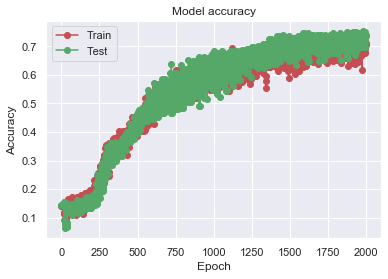

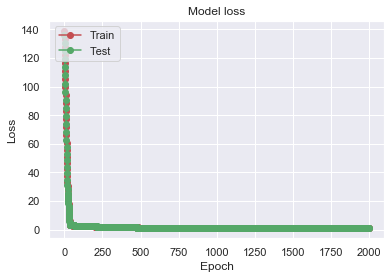

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


plt.plot(history.history['accuracy'],'o-', color="r",label="Training score")
plt.plot(history.history['val_accuracy'], 'o-', color="g",label="Test score")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'],'o-', color="r",label="Training score")
plt.plot(history.history['val_loss'], 'o-', color="g",label="Test score")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(111.5, 0.5, 'true')

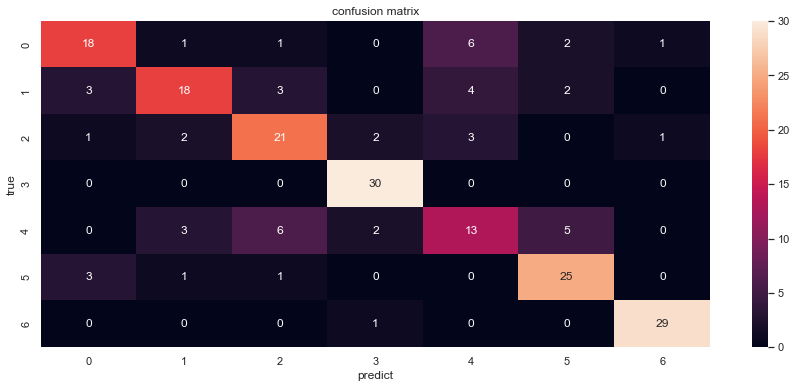

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots(figsize=(15,6))

y_pred=model.predict(X_test)
C2= confusion_matrix(np.argmax(y_test.to_numpy(), axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(C2,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y

In [14]:
parameters = {'batch_size': [16,32,64], 'epochs':[70,100,500,1000,2000,5000]}

In [15]:
estimator = KerasClassifier(build_fn=create_model, verbose=0)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='roc_auc_ovr', cv=10,n_jobs=-1)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [16]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 7)                 28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


{'batch_size': 16, 'epochs': 5000}

In [17]:
best_epochs= grid_search.best_params_['epochs']
best_batch= grid_search.best_params_['batch_size']

# Validacion Cruzada

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.1, stratify = df["etiqueta"])

In [19]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=create_model, verbose=2, batch_size=best_batch, epochs=best_epochs)

accuracies = cross_val_score(estimator, X_train,  y_train, cv=10, n_jobs=-1)
mean_acc = accuracies.mean()
variance_acc = accuracies.std()
print('Precision media: ', mean_acc,"+/-",variance_acc)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


Precision media:  0.7157450139522552 +/- 0.07371396495234812


In [9]:
weights = model.get_weights()
weights

[array([[-0.3054118 ,  0.19672467,  0.3036008 ,  0.36887905,  0.01833405,
          0.13355319, -0.72867876],
        [ 0.25473478,  0.4545746 ,  0.36056963,  0.03271302,  0.26273486,
          0.38379812,  0.06879364],
        [ 0.4532768 , -0.4212724 , -0.5355698 , -0.35559526,  0.0139911 ,
         -0.14734381,  0.99180347]], dtype=float32),
 array([-2.3068187 , -2.6288319 ,  2.6006598 ,  9.826059  , -0.26557595,
        -9.906013  ,  6.921798  ], dtype=float32)]